# Cross-Validation

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

boston = load_boston()

df = pd.DataFrame(boston.data, columns = boston.feature_names)
df['MEDV'] = boston.target[df.index]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [2]:
from sklearn.model_selection import KFold

#KFold(n_splits, shuffle, random_state)
kfold = KFold(4, False)

data = df[["LSTAT","MEDV"]]

for train, test in kfold.split(data):
    print('train: {}, test: {}'.format(train, test))
    print()

train: [127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252
 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270
 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288
 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306
 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324
 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342
 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360
 361 362 363 364 365 366 367 368 369 370 371

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass shuffle=False as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [3]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

k = 4
kfold = KFold(k, True, 103)
r2_train_avg, r2_test_avg = 0, 0

for train, test in kfold.split(data):
 
    X_train = data.iloc[train]["LSTAT"].values.reshape(-1,1)
    y_train = data.iloc[train]["MEDV"]
    X_test = data.iloc[test]["LSTAT"].values.reshape(-1,1)
    y_test = data.iloc[test]["MEDV"]
 
    reg = LinearRegression().fit(X_train,y_train)
 
    y_train_hat = reg.predict(X_train)
    y_test_hat = reg.predict(X_test)
 
    r2_train = r2_score(y_train,y_train_hat)
    r2_test = r2_score(y_test,y_test_hat)
    print("R2_train es {:.3f}, R2_test es {:.3f}".format(r2_train,r2_test))
 
    r2_train_avg += r2_train
    r2_test_avg += r2_test

r2_train_avg/k, r2_test_avg/k

R2_train es 0.542, R2_test es 0.543
R2_train es 0.545, R2_test es 0.539
R2_train es 0.543, R2_test es 0.544
R2_train es 0.547, R2_test es 0.534


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass shuffle=True, random_state=103 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


(0.5442607090850983, 0.5402526666424875)

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass shuffle=True, random_state=103 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


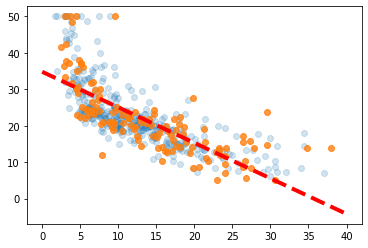

R2_train es 0.542, R2_test es 0.543


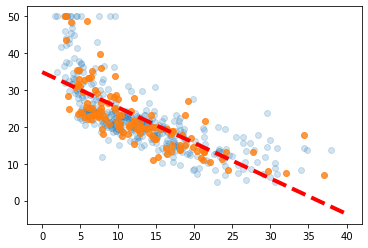

R2_train es 0.545, R2_test es 0.539


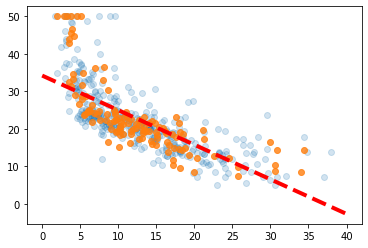

R2_train es 0.543, R2_test es 0.544


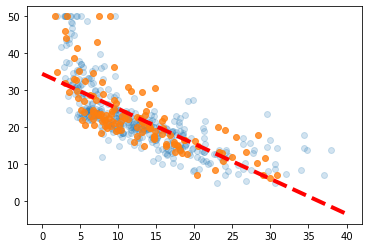

R2_train es 0.547, R2_test es 0.534


(0.5442607090850983, 0.5402526666424875)

In [4]:
k= 4

kfold = KFold(k, True, 103)
r2_train_avg,r2_test_avg=0,0

for train, test in kfold.split(data):
    X_train = data.iloc[train]["LSTAT"].values.reshape(-1,1)
    y_train = data.iloc[train]["MEDV"]
    
    X_test = data.iloc[test]["LSTAT"].values.reshape(-1,1)
    y_test = data.iloc[test]["MEDV"]
    
    reg = LinearRegression().fit(X_train,y_train)
    
    y_train_hat = reg.predict(X_train)
    y_test_hat = reg.predict(X_test)
    r2_train = r2_score(y_train,y_train_hat)
    r2_test = r2_score(y_test,y_test_hat)

    x_model = np.linspace(0,40,num=100)
    y_model = reg.predict(x_model.reshape(-1,1))
    plt.scatter(X_train, y_train, alpha = 0.2)
    plt.scatter(X_test, y_test, alpha = 0.8)
    plt.plot(x_model, y_model,"r--", lw = 4)
    plt.show()

    print("R2_train es {:.3f}, R2_test es {:.3f}".format(r2_train,r2_test))
    r2_train_avg += r2_train
    r2_test_avg += r2_test
    
r2_train_avg/k, r2_test_avg/k